# CIS 9665 Final Project: Group 9

### BY:
##### AARIF JAHAN,  JACOB BAYER, JAMES MUEHLEMANN , JOHN MAKHIJANI, JUNA IAFELICE, SHAWN MENG


In [1]:
import pandas as pd
from nltk import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from datetime import datetime
import time
import os

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LassoCV, RidgeCV
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB

#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
pd.options.mode.chained_assignment = None  # default='warn'

## Loading the data

In [199]:
drug_reviews = pd.read_csv("https://raw.githubusercontent.com/smeng0428/CIS9665/main/drug_reviews.csv")

In [3]:
#drug_reviews = drug_reviews[:1000]

In [200]:
drug_reviews.shape

(10000, 8)

In [4]:
drug_reviews.head(10)

,Unnamed: 0,uniqueID,drugName,condition,review,rating,date,usefulCount
0,0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


Our dataset consists of 10000 drug reviews, the name of the drug the review is about, the condition that the drug is designed to treat, the rating the user gave the drug, the date the review was given, and the number of users who found the review useful. Each review has a unique id.

## Cleaning the data

In [5]:
missing_rows = []
for idx, data in drug_reviews.isnull().iterrows():
    if any(data):
        missing_rows.append(idx)

In [6]:
drug_reviews.loc[missing_rows]

,Unnamed: 0,uniqueID,drugName,condition,review,rating,date,usefulCount
30,30,51452,Azithromycin,NaN,"""Very good response. It is so useful for me. """,10,18-Aug-10,1
148,148,61073,Urea,NaN,"""Accurate information.""",10,2-Jul-11,13
488,488,132651,Doxepin,NaN,"""So far so good. Good for me and I can take it...",10,20-Oct-10,25
733,733,44297,Ethinyl estradiol / norgestimate,NaN,"""I haven&#039;t been on it for a long time and...",8,24-Jan-11,1
851,851,68697,Medroxyprogesterone,NaN,"""I started the shot in July 2015 and ended in ...",6,23-Mar-17,1
1014,1014,182050,Acetaminophen / caffeine,NaN,"""I get migraine and have found out by taking e...",10,19-Feb-12,7
1124,1124,154412,Tavaborole,NaN,"""I have struggled with nail for 8 or ten years...",10,21-May-16,6
1163,1163,110945,Acetaminophen / butalbital / caffeine / codeine,NaN,"""I found that while this medicine does relieve...",5,11-Dec-11,3
1253,1253,74242,Ethinyl estradiol / norethindrone,NaN,"""I started Loestrin and within two months I ex...",4,28-Apr-11,0
1267,1267,58340,Conjugated estrogens,NaN,"""I had to have a total hysterectomy in 2009 in...",10,11-Jun-16,27


Since all of the cases of missing data in this dataset are missing conditions, we can define these cases as conditions of their own in order to avoid them being grouped together under the same condition. This data is still usable.

In [7]:
drug_reviews.loc[missing_rows, 'condition'] = drug_reviews.loc[missing_rows, 'drugName']

Some encodings need to be replaced with characters below.

In [8]:
def replacements(string):
    replace_dict = {'"'      : '',
                    '&#039;' : "'",
                    '&amp'   : '&'}
    
    for key, value in replace_dict.items():
        string = string.replace(key, value)
        
    return string

In [9]:
drug_reviews['review'] = drug_reviews.review.map(replacements)

Here are some examples of reviews:

In [10]:
drug_reviews['review'][10]

"I have been on this medication almost two weeks, started out on 25mg and working my way up to 100mg, currently at 50mg. No headaches at all so far and I was having 2-3 crippling migraines a week. I have lost 5.2lbs so far but note I am really paying close attention to what I am eating, I have a lot of weight to lose and if weight loss is a side effect I want to help it along as much as I can.  Now, other side effects, they are there the word recall issues exist, the memory issues, the worst of it seems to be the vision disturbances, there have been times I have just not driven because I'm sure it would not have been safe. The good news is it seems to be wearing off...I have tons of energy and I am in a great mood."

In [11]:
drug_reviews['review'][12]

"I had Crohn's with a resection 30 years ago and have been mostly in remission since.  Have recently had a bad flare and narrowing at the anastomosis and need to be on medication, but haven't found one that I can handle.  Asacol gave me such serious body aching and fatigue that I could not function.  Pentasa immediately gave me heart palpitations and arrhythmias so I had to discontinue it."

In [12]:
# create lemmatizer object
lancaster = nltk.LancasterStemmer()

# create function to clean text
def clean_text(s):
    
    # convert text to lowercase
    s = s.lower()
    
    # tokenize each review
    tokens = nltk.tokenize.word_tokenize(s)
     
    # stem / lemmatize each token (walked --> walk, computers --> computer, etc.)
    clean_tokens = [lancaster.stem(token) for token in tokens]

    # remove punctuation
    clean_tokens = [token for token in clean_tokens if token.isalpha()]
    
    # remove stop words
    clean_tokens = [token for token in clean_tokens if token not in nltk.corpus.stopwords.words("english")]
    
    return ' '.join(clean_tokens)

Cleaning the text and printing some examples of cleaned reviews:

In [13]:
drug_reviews['cleaned_review'] = drug_reviews.review.map(clean_text)

In [14]:
drug_reviews['cleaned_review']

0                sid effect tak combin bystol mg fish oil
1       son halfway four week intun becam concern beg ...
2       us tak anoth contraceiv pil cyc light period m...
3       thi first tim us form bir control glad went pa...
4       suboxon complet turn lif around feel healthy e...
                              ...                        
9995    wher begin hav nexplanon year half ther pain g...
9996    nataz mad moody reason caus hav period rang da...
9997    horr horr expery thi drug immedy aft us bedtim...
9998    start tak solodyn mon aft stop bir control dev...
9999    okay yo freak lik stop sery okay boyfriend unp...
Name: cleaned_review, Length: 10000, dtype: object

In [15]:
drug_reviews['review'][0]

'It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil'

In [16]:
drug_reviews['cleaned_review'][0]

'sid effect tak combin bystol mg fish oil'

In [17]:
nltk.tokenize.word_tokenize(drug_reviews['cleaned_review'][0])

['sid', 'effect', 'tak', 'combin', 'bystol', 'mg', 'fish', 'oil']

In [18]:
drug_reviews['review'][50]

"Hey Guys,  It's been 4 months since my last post as I wanted to give it a few months to see how this was going to work.  So, I have been on Trulicity for six months now with Metformin.  When I hit the five month period the diarrhea, gas, sulphur belching finally subsided.  I now longer have any of those side effects.  However, I still haven't lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol.  I have been back on the Metformin with Trulicity for about a week now, so we will see what this does.  I was diagnosed as  stage 3 chronic kidney disease (CKD 3) so I am watching diet closely."

In [19]:
drug_reviews['cleaned_review'][50]

'hey guy month sint last post want giv month see thi going work hav trul six month metformin hit fiv mon period diarrhe gas sulph belch fin subsid long hav thos sid effect howev stil hav lost weight al think becaus first start trul tak glimepirid sid effect weight gain think two med wer fight oth lol hav back metformin trul week wil see thi doe diagnos stag chronic kidney diseas ckd watch diet clos'

In [20]:
x = drug_reviews.cleaned_review
y = drug_reviews.rating.map(lambda x: 1 if x < 4 else 0)

In [21]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 0.7, random_state = 0)

## Generating Features

We will generate features using several methods, then test which method performs the best in a logistic regression.

The methods we will test are:
1. Bag of words
2. TF-IDF
3. Word2vec

### Bag of Words

A simplified representation used in NLP. It originally comes from linguist Harris Zellig’s article of ‘Distributional Structure’ [1]. This method focuses on the frequency distribution of each word type. However, it disregards the grammar and the order of the words. 

In our study, we first used the bag of words representation to extract features from the drug reviews. The frequency of each unique word can be used as features to train the rating classifier. After the extraction, the frequency distribution for each review is stored in a dictionary and then all dictionaries are converted to pandas dataframe for the whole corpus of the drug review dataset.

For simplicity, we are using the unigram model for the bag of words representation. The bag of words representation is relatively sparse because only a fraction of the total unique words occurred in one review. We discarded the words which occurred less than 20 times in the dataset to reduce the dimension and speed up the training time. 


In [22]:
count_vec = CountVectorizer(ngram_range = (1,1), stop_words = "english", lowercase = True)
train_counts = count_vec.fit_transform(x_train)

bag_train = pd.DataFrame(train_counts.toarray(), columns=count_vec.get_feature_names_out(), index = x_train.index)

# Get a count of how often each word appears in the training data
word_counts = bag_train.sum()
word_counts = word_counts.sort_values(ascending = False)

# Look at most frequently occurring words in the training data
word_counts.head(30)

hav       8588
thi       5660
tak       4598
day       4246
year      2862
aft       2815
work      2759
effect    2664
week      2554
start     2526
pain      2371
feel      2263
sid       2251
tim       2233
al        2169
med       1883
month     1872
lik       1851
pil       1808
period    1793
ev        1591
help      1570
doct      1392
mor       1374
becaus    1359
got       1351
ar        1323
wil       1253
mon       1234
weight    1231
dtype: int64

In [23]:
# Number of words in each observation
total_words = bag_train.sum(axis = 1)
total_words

7681    41
9031    17
3691    63
202     39
5625    70
        ..
9225    19
4859    15
3264    43
9845    48
2732    63
Length: 7000, dtype: int64

In [24]:
# The median number of words for a single observation is 36, based off below.
total_words.describe()

count    7000.000000
mean       39.755857
std        20.668039
min         1.000000
25%        23.000000
50%        39.000000
75%        58.000000
max       232.000000
dtype: float64

In [25]:
def create_bow_features(x_train, x_val, ngram_range = (1,1), word_count_limit = 20):
    count_vec = CountVectorizer(ngram_range = ngram_range, stop_words = "english", lowercase = True)
    train_counts = count_vec.fit_transform(x_train)

    bag_train = pd.DataFrame(train_counts.toarray(), columns=count_vec.get_feature_names_out(), index = x_train.index)

    # Get a count of how often each word appears in the training data
    word_counts = bag_train.sum()
    word_counts = word_counts.sort_values(ascending = False)
    
    # Reduce the number of features down to words that occur at least n times
    reduced_bag_train = bag_train[word_counts[word_counts >= word_count_limit].index]
    
    # Standardize the features
    reduced_bag_train = (reduced_bag_train - reduced_bag_train.mean()) / reduced_bag_train.std()
    
    # get bag of words on validation set using the fit based off the training set - 
    #### hence, why we use transform here rather than fit_transform ####
    val_counts = count_vec.transform(x_val)
    bag_val = pd.DataFrame(val_counts.toarray(), columns=count_vec.get_feature_names_out(), index = x_val.index)

    # get reduced data frame for validation dataset
    reduced_bag_val = bag_val[reduced_bag_train.columns]
    
    # Standardize the features
    reduced_bag_val = (reduced_bag_val - reduced_bag_val.mean()) / reduced_bag_val.std()
    
    return reduced_bag_train, reduced_bag_val.fillna(0)

In [26]:
bow_train, bow_val = create_bow_features(x_train, x_val)

In [27]:
bow_train.head()

,hav,thi,tak,day,year,aft,work,effect,week,start,...,advair,strength,port,cross,everybody,tamiflu,fib,crohn,colon,ssris
7681,-0.166753,0.186378,-0.701315,-0.607288,-0.572486,-0.573199,-0.578086,0.948951,-0.501665,-0.523276,...,-0.032545,-0.04885,-0.04885,-0.053525,-0.053525,-0.033823,-0.046929,-0.045218,-0.048850,-0.04885
9031,-0.166753,-0.787237,0.366367,0.393893,-0.572486,0.852163,0.888605,-0.583027,-0.501665,0.926816,...,-0.032545,-0.04885,-0.04885,-0.053525,-0.053525,-0.033823,-0.046929,-0.045218,-0.048850,-0.04885
3691,-0.901808,1.159993,1.434049,1.395074,-0.572486,5.128252,0.888605,-0.583027,0.873297,0.926816,...,-0.032545,-0.04885,-0.04885,-0.053525,-0.053525,-0.033823,-0.046929,-0.045218,-0.048850,-0.04885
202,-0.901808,1.159993,-0.701315,2.396255,-0.572486,2.277526,-0.578086,-0.583027,0.873297,-0.523276,...,-0.032545,-0.04885,-0.04885,-0.053525,-0.053525,-0.033823,-0.046929,-0.045218,-0.048850,-0.04885
5625,-0.166753,-0.787237,-0.701315,1.395074,0.827724,-0.573199,-0.578086,-0.583027,-0.501665,-0.523276,...,-0.032545,-0.04885,-0.04885,-0.053525,-0.053525,-0.033823,-0.046929,-0.045218,17.048548,-0.04885


In [28]:
bow_val.head()

,hav,thi,tak,day,year,aft,work,effect,week,start,...,advair,strength,port,cross,everybody,tamiflu,fib,crohn,colon,ssris
9394,1.327447,-0.820236,1.397708,-0.611476,-0.574941,0.857515,-0.566504,-0.593838,-0.510187,-0.531122,...,-0.025824,-0.068462,-0.051916,-0.050183,-0.060654,-0.049041,-0.040852,-0.036533,-0.048353,-0.034518
898,-0.151053,0.135750,0.343630,0.400343,-0.574941,0.857515,-0.566504,-0.593838,0.896579,0.920031,...,-0.025824,-0.068462,-0.051916,-0.050183,-0.060654,-0.049041,-0.040852,-0.036533,-0.048353,-0.034518
2398,-0.151053,0.135750,-0.710449,-0.611476,-0.574941,-0.579661,-0.566504,-0.593838,-0.510187,-0.531122,...,-0.025824,-0.068462,-0.051916,-0.050183,-0.060654,-0.049041,-0.040852,-0.036533,-0.048353,-0.034518
5906,-0.890303,0.135750,-0.710449,-0.611476,0.825078,-0.579661,-0.566504,-0.593838,-0.510187,-0.531122,...,-0.025824,-0.068462,-0.051916,-0.050183,-0.060654,-0.049041,-0.040852,-0.036533,-0.048353,-0.034518
2343,-0.890303,0.135750,-0.710449,-0.611476,-0.574941,-0.579661,0.911333,-0.593838,0.896579,-0.531122,...,-0.025824,-0.068462,-0.051916,-0.050183,-0.060654,-0.049041,-0.040852,-0.036533,-0.048353,-0.034518


### TF - IDF

TF-IDF stands for Term Frequency Inverse Document Frequency. TF-IDF calculates a score for each token based on the relative importance of the token in a document vs the overall corpus. Compared with the bag of words, TF-IDF not only considers the frequency of words on the document level but also considers the frequency of words on the corpus level.

In [29]:
def create_tf_idf_features(x_train, x_val, ngram_range = (1,1), word_count_limit = 20):
    ## tf_idf
    tf_idf = TfidfVectorizer(ngram_range = ngram_range, stop_words = "english", lowercase = True)

    # train
    train_tf_idf = tf_idf.fit_transform(x_train)
    train_tf_idf = pd.DataFrame(train_tf_idf.toarray(), columns = tf_idf.get_feature_names_out(), index = x_train.index)

    # validation
    val_tf_idf = tf_idf.transform(x_val)
    val_tf_idf = pd.DataFrame(val_tf_idf.toarray(), columns = tf_idf.get_feature_names_out(), index = x_val.index)

    word_counts = train_tf_idf.sum()
    word_counts = word_counts.sort_values(ascending = False)
    
    # get subset of columns based off word counts like done above
    train_tf_idf = train_tf_idf[word_counts[word_counts >= word_count_limit].index]
    val_tf_idf = val_tf_idf[word_counts[word_counts >= word_count_limit].index]
    
    return train_tf_idf, val_tf_idf.fillna(0)
    

In [30]:
train_tf_idf, val_tf_idf = create_tf_idf_features(x_train, x_val)

In [31]:
train_tf_idf.head()

,hav,thi,tak,day,work,pain,effect,year,aft,week,...,becom,chest,lit,tend,famy,entir,eith,school,drop,sign
7681,0.047950,0.054437,0.000000,0.000000,0.000000,0.000000,0.071039,0.00000,0.000000,0.000000,...,0.0,0.0,0.15903,0.0,0.00000,0.159499,0.0,0.0,0.0,0.0
9031,0.096584,0.000000,0.119392,0.129266,0.141658,0.000000,0.000000,0.00000,0.142630,0.000000,...,0.0,0.0,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
3691,0.000000,0.088179,0.096015,0.103955,0.056960,0.000000,0.000000,0.00000,0.229404,0.061428,...,0.0,0.0,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
202,0.000000,0.108912,0.000000,0.192597,0.000000,0.000000,0.000000,0.00000,0.141672,0.075872,...,0.0,0.0,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
5625,0.029989,0.000000,0.000000,0.080273,0.000000,0.052531,0.000000,0.04421,0.000000,0.000000,...,0.0,0.0,0.00000,0.0,0.10005,0.000000,0.0,0.0,0.0,0.0


In [32]:
val_tf_idf.head()

,hav,thi,tak,day,work,pain,effect,year,aft,week,...,becom,chest,lit,tend,famy,entir,eith,school,drop,sign
9394,0.164953,0.000000,0.135938,0.000000,0.000000,0.0,0.0,0.000000,0.081198,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
898,0.032181,0.036534,0.039781,0.043071,0.000000,0.0,0.0,0.000000,0.047523,0.050902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2398,0.074156,0.084187,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5906,0.000000,0.069917,0.000000,0.000000,0.000000,0.0,0.0,0.090792,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2343,0.000000,0.061109,0.000000,0.000000,0.078948,0.0,0.0,0.000000,0.000000,0.085140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Word2Vec

A neutral network based approach that represents each word in a corpus by a vector of numeric values. It was developed by a team at Google in 2013. [2] An embedding represents a word across N dimensions. This method tries to predict a word with its surrounding context.

In [33]:
from gensim.models import Word2Vec
from tqdm import tqdm
import numpy as np

In [34]:
def create_word2vec_features(cleaned_x_data, func, min_count = 5, vector_size = 300, window_size = 4):
    
    word2vec = Word2Vec(tokenized_x_train, min_count = min_count, vector_size = vector_size, window = window_size)
    
    agg_embeddings = []
    
    for index in tqdm(range(cleaned_x_data.shape[0])):

        # get the document by index
        document = cleaned_x_data.iloc[index]

        # get word embeddings for the current document in the loop
        # the if condition handles cases where the word is not in the word2vec model 
        # this would include the words that occurred less than 5 times as limited in the code earlier
        embeddings = [word2vec.wv[word] for word in document if word in word2vec.wv]

        # if none of the words have a word embedding, there will be an empty list
        # need 300 dimensions to match the regular cases, so we'll create a list of 300 missing values
        if embeddings == []:
            agg_embeddings.append([0] * 300)
        else:
            # otherwise, just get the mean componentwise across all the word embeddings and append to our list
            agg = func(embeddings, axis = 0)
            agg_embeddings.append(agg)
            
            
    agg_embeddings = [array if isinstance(array, list) else array.tolist() for array in agg_embeddings]
    agg_embeddings = pd.DataFrame(agg_embeddings)
    return agg_embeddings

In [35]:
tokenized_x_train = x_train.map(lambda x: nltk.word_tokenize(x))
tokenized_x_val = x_val.map(lambda x: nltk.word_tokenize(x))

In [36]:
word2vec_features_train = create_word2vec_features(tokenized_x_train, np.mean)
word2vec_features_val = create_word2vec_features(tokenized_x_val, np.mean)
word2vec_features_train.head(10)

100%|█████████████████████████████████████| 3000/3000 [00:00<00:00, 7629.05it/s]


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.071071,0.196290,0.057004,0.025385,-0.002079,-0.176553,0.060937,0.323228,-0.007242,-0.067535,...,0.025090,0.210744,0.058532,-0.006515,0.100688,0.260220,-0.026190,-0.170785,0.210927,-0.106943
1,0.005782,-0.031365,0.119952,0.233522,0.025109,-0.184142,0.108265,0.469888,-0.122604,-0.130885,...,0.113302,0.248225,0.097809,0.085791,0.203546,0.224615,-0.126671,-0.102746,0.333902,-0.151025
2,0.130480,0.168337,-0.021751,0.176668,0.068264,-0.258609,0.113845,0.650018,-0.139930,-0.046009,...,0.217327,0.282912,0.158012,0.206766,0.110822,0.186553,-0.105466,-0.155591,0.193563,-0.196429
3,0.045168,0.079893,0.050188,0.167162,0.071588,-0.207171,0.079367,0.498370,-0.009239,-0.056362,...,0.079930,0.228392,0.101900,0.151049,0.204854,0.246803,-0.054855,-0.086104,0.219945,-0.054820
4,0.046884,0.139016,0.022322,0.099424,0.058589,-0.199313,0.057199,0.434701,-0.022100,-0.034083,...,0.057746,0.190533,0.110967,0.084362,0.138907,0.243801,-0.016121,-0.119751,0.180566,-0.054971
5,0.189223,0.330231,0.054618,-0.019161,-0.150276,0.113720,-0.127462,0.301251,-0.276144,0.089048,...,0.197059,0.153229,0.029743,-0.101378,-0.186522,0.445370,-0.061055,-0.498343,0.441748,-0.205845
6,0.078019,0.158251,0.056346,-0.001907,0.018470,-0.221812,0.126145,0.349252,0.050674,-0.111612,...,-0.022972,0.225433,0.077117,0.060710,0.202537,0.239833,-0.046699,-0.086330,0.138844,-0.083782
7,0.137489,0.182978,0.047387,0.086763,0.026476,-0.259367,0.115238,0.490590,-0.074532,-0.079717,...,0.094957,0.248467,0.120345,0.116530,0.113894,0.211523,-0.053081,-0.139059,0.194075,-0.105896
8,0.081301,0.124434,-0.015933,0.113446,0.036548,-0.224792,0.083401,0.481942,-0.074684,0.010348,...,0.093728,0.264746,0.137877,0.150921,0.192123,0.240545,-0.091411,-0.105126,0.159595,-0.155153
9,0.032586,0.069437,0.091807,0.133113,-0.004459,-0.126964,0.061553,0.389616,-0.030684,-0.067946,...,0.055740,0.219912,0.044842,0.043152,0.156073,0.265003,-0.075747,-0.134987,0.262958,-0.138441


In [37]:
word2vec_features_train_sum = create_word2vec_features(tokenized_x_train, np.sum)
word2vec_features_val_sum = create_word2vec_features(tokenized_x_val, np.sum)
word2vec_features_train_sum.head(10)

100%|█████████████████████████████████████| 3000/3000 [00:00<00:00, 8672.90it/s]


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.254068,9.048612,3.199161,2.572608,0.209813,-7.477640,2.437582,16.699244,0.263798,-4.109018,...,1.044019,9.035000,4.004066,-1.131094,4.480713,11.965630,-0.765114,-6.726132,9.715809,-3.890528
1,-0.352375,0.603152,2.138405,4.230514,1.300000,-2.321594,2.220886,9.072989,-0.583814,-2.493893,...,2.264481,3.904599,2.222946,2.507464,3.033671,5.540320,-2.464605,-1.691704,6.570253,-2.523621
2,5.316130,10.493611,-0.037871,10.142457,8.095483,-13.016161,8.464674,41.482460,-10.506984,-1.483019,...,19.163168,20.928148,6.823894,15.456409,8.428804,18.504787,-10.524269,-8.225576,17.820269,-13.038038
3,-0.417106,3.321849,1.800961,5.853625,3.245428,-7.123669,3.072403,19.347153,-0.492027,-0.445577,...,3.773383,9.078521,2.989240,6.553803,7.314037,12.242382,-3.133512,-2.855366,9.662786,-1.758097
4,0.987218,10.540433,1.486007,7.837720,5.731050,-11.340916,3.004858,31.025133,-1.267394,-1.705135,...,5.007615,14.268850,8.301687,6.443442,9.343496,19.647081,-1.654498,-7.945626,12.609484,-3.006414
5,0.426703,1.299875,0.193610,0.317176,-0.469427,0.630776,-0.387079,0.262954,-0.805314,0.052650,...,0.727491,0.496660,0.258054,-0.474957,-0.607665,1.076691,0.167252,-1.056261,1.539240,-0.127206
6,1.266235,6.204525,2.286257,-0.150640,0.527002,-9.369805,5.585534,17.558969,2.018551,-4.619874,...,-0.022077,8.929662,4.302763,2.006425,8.232513,10.835121,-2.510594,-3.542765,5.855734,-4.380410
7,5.783719,12.223915,4.049468,5.291444,4.206434,-14.787175,7.470928,33.230808,-4.467106,-5.425469,...,8.997616,16.500599,8.402166,8.585455,8.362861,15.868111,-5.370965,-7.548213,15.344161,-7.554070
8,1.658522,3.920982,-0.233109,3.231879,1.994899,-5.350175,2.476784,13.938203,-2.597260,1.150446,...,3.493265,7.597333,3.437700,4.599849,4.827631,9.005677,-3.043394,-2.982752,5.024845,-4.260803
9,-0.238617,3.932847,4.110527,5.362311,0.040441,-4.919735,3.007246,17.505959,-0.101662,-3.424789,...,2.831482,7.558506,2.574472,1.892579,4.905837,11.570454,-2.730597,-4.309787,11.256479,-4.696788


This function gets importances from any linear function, such as a lasso or ridge

In [38]:
def get_linear_importances(linear_model, train_data):
    var_coefs = {var : coef for var, coef in zip(train_data.columns, linear_model.coef_[0])}
    zero_var_coefs =  var_coefs.copy()
    nonzero_var_coefs =  var_coefs.copy()
    for variable, coefficient in var_coefs.items():
        if coefficient != 0:
            del zero_var_coefs[variable]
        if coefficient == 0:
            del nonzero_var_coefs[variable]
            
    sorted_nonzero = {k: v for k, v in sorted(nonzero_var_coefs.items(), key=lambda item: item[1], reverse = True)}
    return sorted_nonzero

This function runs the specified model and outputs the results as a tuple, which is intended to be recorded in a series of dictionaries.

In [39]:
def run_model(title, x_train, y_train, x_val, y_val, model_func, 
              params_dict, search_type = "grid",
              show_plots = True):
    
    def plot_roc(fpr, tpr, title):
        plt.clf()
        plt.plot(fpr, tpr)
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.plot([0, 1], [0, 1], color = 'black', linestyle = "dashed")
        plt.title(title)
        plt.show()
    
    def plot_confusion_matrix(x, y, model, title):
        plt.clf()
        y_prob = model.predict_proba(x)
        yhat = [1 if i >= 0.50 else 0 for i in y_prob[:,1]]
        confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y, yhat), 
                                        columns = ['positive', 'negative'], 
                                        index = ['positive', 'negative'])
        
        confusion_matrix.index.name   = 'Actual'
        confusion_matrix.columns.name = 'Predicted'
        confusion_matrix              = sns.heatmap(confusion_matrix, 
                                                    annot = True, 
                                                    square = True,
                                                    fmt = 'g', 
                                                    cmap = sns.diverging_palette(20,220,n=200)).set_title(title)
        plt.show()
    
        
    
    # if only one value for the parameters is provided, the grid/randomized search will not actually do anything

    print("    Running model using specified parameters")
    
    if search_type == "randomized":
        model = RandomizedSearchCV(model_func(), 
                                         params_dict,
                                         n_jobs = 4, 
                                         scoring = "roc_auc",
                                         n_iter = 100,
                                         random_state = 0)
        
    elif search_type == "grid":
        model = GridSearchCV(model_func(), 
                                   params_dict,
                                   n_jobs = 4, 
                                   scoring = "roc_auc")
        

        
    start = time.time()
    model.fit(x_train, y_train)
    end = time.time()
    
    training_time = (end - start)
    
    # Redefines the model as the best estimator model
    best_params = model.best_params_
    
    model = model.best_estimator_
    
    if model_func in [LogisticRegression, LogisticRegressionCV, LassoCV, RidgeCV]:
        importances = get_linear_importances(model, x_train)
    elif model_func == BernoulliNB:
        importances = None
    else:
        importances = pd.DataFrame(index = x_train.columns, 
                                    data  = {method + '_imp' : model.feature_importances_})
    
    print("    Calculating Metrics")
    
    # predictions
    y_hat_train = model.predict(x_train)
    y_hat_val = model.predict(x_val)
    
    # probabilities
    y_train_prob = model.predict_proba(x_train)
    y_val_prob = model.predict_proba(x_val)

    # roc curves
    fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
    fpr_val, tpr_val, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
    
    
    
    train_metrics = {
    'training_time' : training_time,
    'accuracy'      : metrics.accuracy_score(y_train, y_hat_train),
    'precision'     : metrics.precision_score(y_train, y_hat_train),
    'recall'        : metrics.recall_score(y_train, y_hat_train),
    'f1'            : metrics.f1_score(y_train, y_hat_train),
    'auc'           : metrics.auc(fpr_train, tpr_train)
    }
    
    test_metrics = {
    'training_time' : training_time,
    'accuracy'      : metrics.accuracy_score(y_val, y_hat_val),
    'precision'     : metrics.precision_score(y_val, y_hat_val),
    'recall'        : metrics.recall_score(y_val, y_hat_val),
    'f1'            : metrics.f1_score(y_val, y_hat_val),
    'auc'           : metrics.auc(fpr_val, tpr_val)
    }
    
    
    if show_plots:
        plot_roc(fpr_train, tpr_train, title + ' Training ROC')
        plot_roc(fpr_val, tpr_val, title + ' Validation ROC')
        plot_confusion_matrix(x_train, y_train, model, title + ' Training Confusion Matrix')
        plot_confusion_matrix(x_val, y_val, model, title + ' Validation Confusion Matrix')
    
    return importances, train_metrics, test_metrics, best_params, model

## Ngram selection

In [40]:
def gen_ngram_grid():
    ngram_combos = []
    for i in (1,2):
        for o in (1,2):
            if not i > o:
                combo = (i, o)
                ngram_combos.append(combo)
    return ngram_combos

In [41]:
ngram_search_grid = gen_ngram_grid()
ngram_search_grid

[(1, 1), (1, 2), (2, 2)]

In [42]:
str(ngram_search_grid[1])

'(1, 2)'

#### Bow ngram selection

Here we call the create_bow_features function for each ngram in the ngram search grid and then use the generated features in a logistic regression model using the run_model function.

Now on (1, 1)
    Running model using specified parameters


/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-pack

    Calculating Metrics


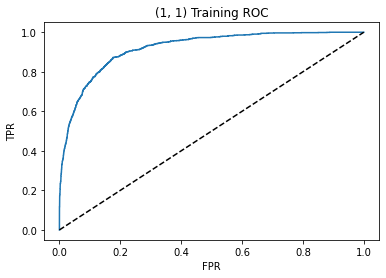

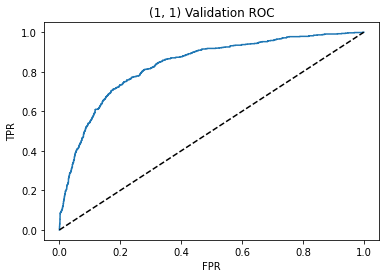

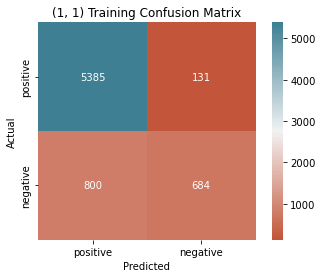

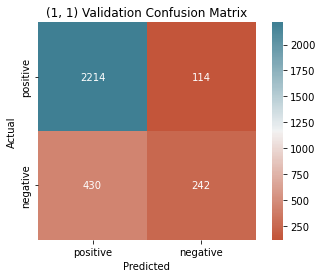

Now on (1, 2)
    Running model using specified parameters
    Calculating Metrics


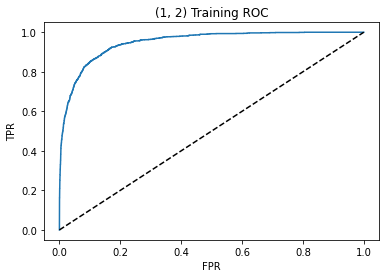

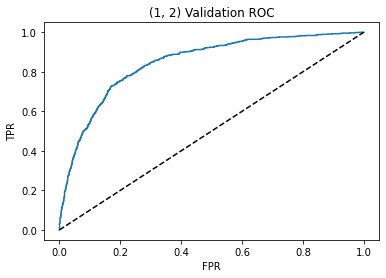

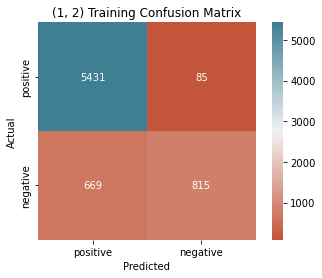

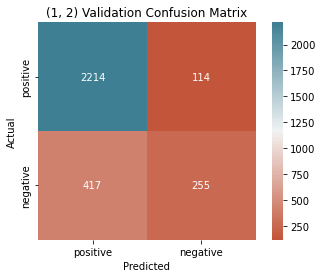

Now on (2, 2)
    Running model using specified parameters
    Calculating Metrics


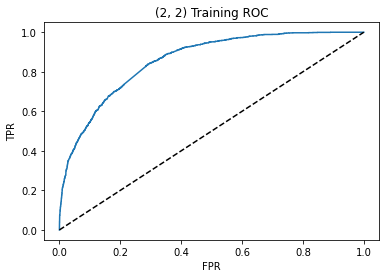

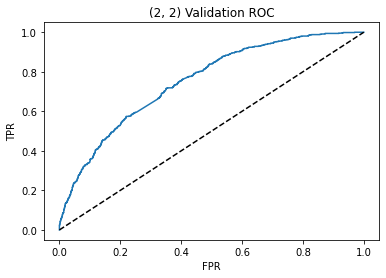

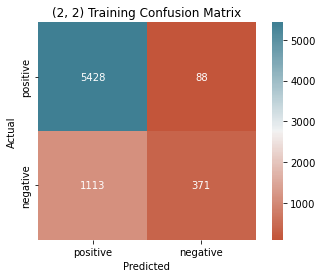

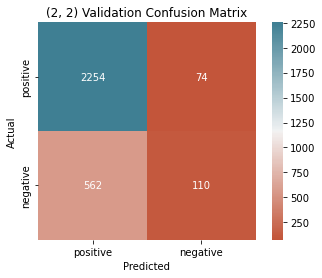

In [43]:
importances_bow_ngrams    = {}
train_metrics_bow_ngrams  = {}
test_metrics_bow_ngrams   = {}
best_params_bow_ngrams    = {}
fit_models_bow_ngrams     = {}


# Since the grid search function is used to pass the params to the model function in the run_model function below,
# we must specify a range even if we are only using a single parameter value

params = {
            'random_state' : [0], 
            'penalty'      : ["l1"], 
            'solver'       : ["liblinear"], 
        }

for ngram_combo in ngram_search_grid:
    train_data, val_data = create_bow_features(x_train, x_val, ngram_range = ngram_combo)
    print("Now on", str(ngram_combo))
    
    loc = str(ngram_combo)
    
    try:
        (importances_bow_ngrams[loc], 
         train_metrics_bow_ngrams[loc], 
         test_metrics_bow_ngrams[loc], 
         best_params_bow_ngrams[loc], 
         fit_models_bow_ngrams[loc])         = run_model(loc, 
                                                         train_data,
                                                         y_train,
                                                         val_data,
                                                         y_val,
                                                         LogisticRegressionCV,
                                                         params)
    
    except Exception as e:
        print("Could not run", loc, "due to", e)

##### Performance statistics for each run:

##### Train

In [46]:
train_metricsdf = pd.DataFrame(train_metrics_bow_ngrams).transpose()
train_metricsdf

,training_time,accuracy,precision,recall,f1,auc
"(1, 1)",11949.809431,0.867000,0.839264,0.460916,0.595041,0.919267
"(1, 2)",660.096744,0.892286,0.905556,0.549191,0.683725,0.949227
"(2, 2)",483.788546,0.828429,0.808279,0.250000,0.381884,0.857785


##### Test

In [47]:
test_metricsdf = pd.DataFrame(test_metrics_bow_ngrams).transpose()
test_metricsdf

,training_time,accuracy,precision,recall,f1,auc
"(1, 1)",11949.809431,0.818667,0.679775,0.360119,0.470817,0.836008
"(1, 2)",660.096744,0.823000,0.691057,0.379464,0.489914,0.846803
"(2, 2)",483.788546,0.788000,0.597826,0.163690,0.257009,0.751994


##### Conclusion:

In [48]:
best_bow_ngram_range = test_metricsdf.auc.idxmax()
print("The best performing ngram range for BOW is:", best_bow_ngram_range)

The best performing ngram range for BOW is: (1, 2)


#### TF-IDF ngram selection

Now on (1, 1)
    Running model using specified parameters
    Calculating Metrics


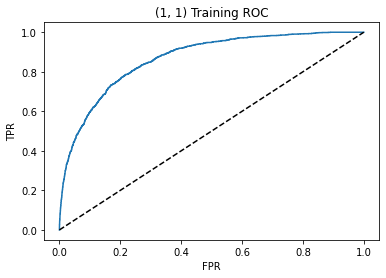

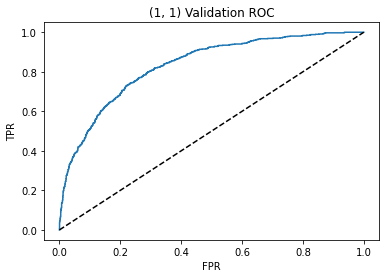

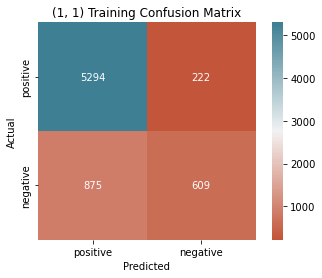

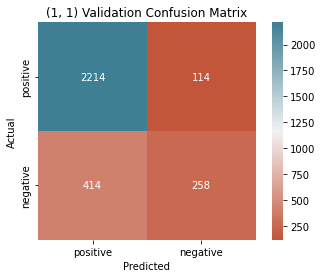

Now on (1, 2)
    Running model using specified parameters
    Calculating Metrics


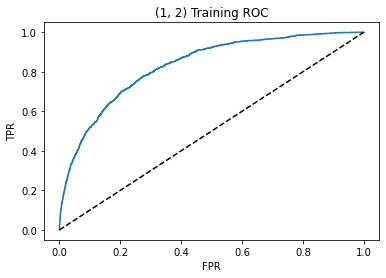

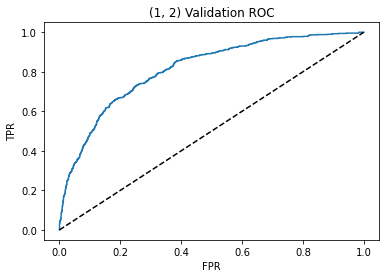

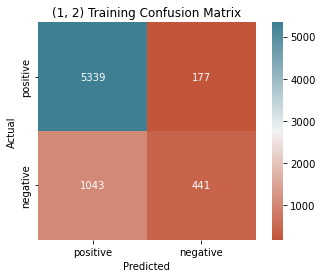

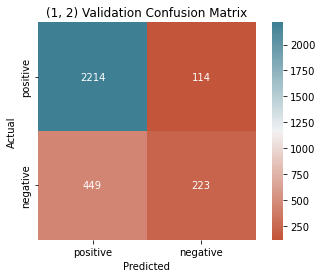

Now on (2, 2)
    Running model using specified parameters
    Calculating Metrics


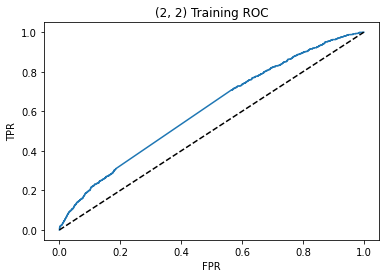

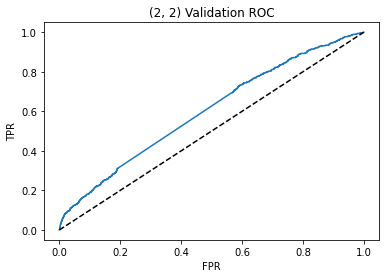

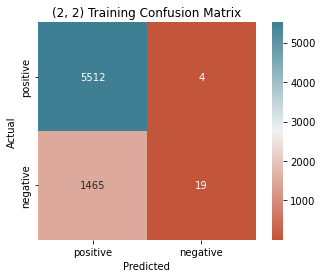

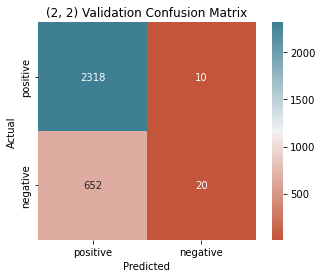

In [52]:
importances_tf_idf_ngrams    = {}
train_metrics_tf_idf_ngrams   = {}
test_metrics_tf_idf_ngrams   = {}
best_params_tf_idf_ngrams     = {}
fit_models_tf_idf_ngrams     = {}

# Since the grid search function is used to pass the params to the model function in the run_model function below,
# we must specify a range even if we are only using a single parameter value

params = {
            'random_state' : [0], 
            'penalty'      : ["l1"], 
            'solver'       : ["liblinear"], 
        }

for ngram_combo in ngram_search_grid:
    train_data, val_data = create_tf_idf_features(x_train, x_val, ngram_range = ngram_combo)
    print("Now on", str(ngram_combo))
    
    loc = str(ngram_combo)
    
    try:
        (importances_tf_idf_ngrams[loc], 
         train_metrics_tf_idf_ngrams[loc], 
         test_metrics_tf_idf_ngrams[loc], 
         best_params_tf_idf_ngrams[loc], 
         fit_models_tf_idf_ngrams[loc])          = run_model(loc, 
                                                             train_data,
                                                             y_train,
                                                             val_data,
                                                             y_val,
                                                             LogisticRegressionCV,
                                                             params)
        
    except Exception as e:
        print("Could not run", loc, "due to", e)

##### Performance statistics for each run:

##### Train

In [53]:
train_metricsdf = pd.DataFrame(train_metrics_tf_idf_ngrams).transpose()
train_metricsdf

,training_time,accuracy,precision,recall,f1,auc
"(1, 1)",5.187450,0.843286,0.732852,0.410377,0.526134,0.866785
"(1, 2)",7.170083,0.825714,0.713592,0.297170,0.419600,0.830155
"(2, 2)",0.646768,0.790143,0.826087,0.012803,0.025216,0.606947


##### Test

In [54]:
test_metricsdf = pd.DataFrame(test_metrics_tf_idf_ngrams).transpose()
test_metricsdf

,training_time,accuracy,precision,recall,f1,auc
"(1, 1)",5.187450,0.824000,0.693548,0.383929,0.494253,0.832062
"(1, 2)",7.170083,0.812333,0.661721,0.331845,0.442022,0.813291
"(2, 2)",0.646768,0.779333,0.666667,0.029762,0.056980,0.600085


##### Conclusion

In [55]:
best_tf_idf_ngram_range = test_metricsdf.auc.idxmax()
print("The best performing ngram range for TF IDF is:", best_tf_idf_ngram_range)

The best performing ngram range for TF IDF is: (1, 1)


We believe that (1,2) will be best suited to this data, so we will set (1,2) as the optimal ngram range instead. This allows the model to take advantage of context surrounding a word, which will make it more generalizable to new, unseen reviews.

In [56]:
best_tf_idf_ngram_range = '(1,2)'

## Feature generation method selection
Now that we have identified the optimal ngrams to use in BOW and TF-IDF, we generate a training and validation dataset using each method (using the optimal ngrams). We will now attempt to see which feature generation method is the best: 
1. BOW
2. TF-IDF
3. Word2vec

In [57]:
bow_train, bow_val = create_bow_features(x_train, x_val, ngram_range = eval(best_bow_ngram_range))
tf_idf_train, tf_idf_val = create_tf_idf_features(x_train, x_val, ngram_range = eval(best_tf_idf_ngram_range))

##### The output of the cell below contains a keyboard interrupt. This is irrelevant, but re-running this cell would take two hours.

Now on bag_of_words
    Running model using specified parameters
    Calculating Metrics


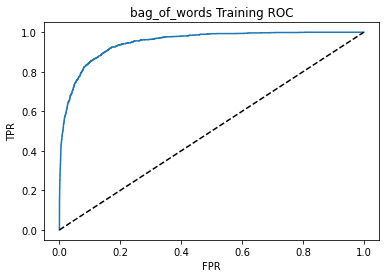

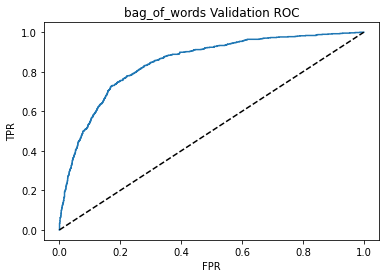

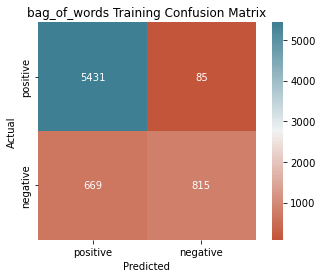

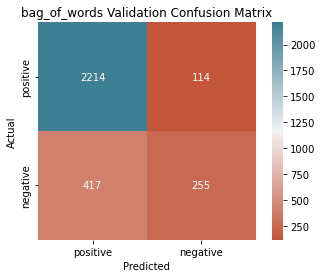

Now on tf_idf
    Running model using specified parameters
    Calculating Metrics


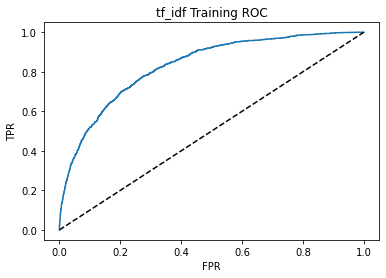

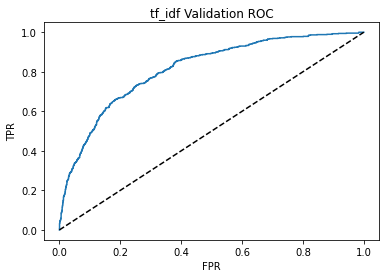

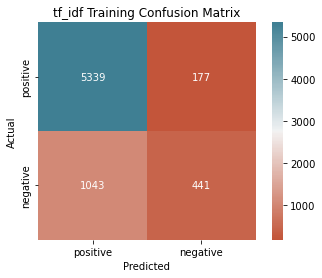

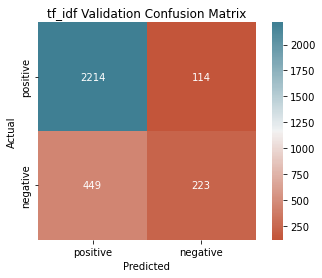

Now on word2vec_avg
    Running model using specified parameters


/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-pack

/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-pack

    Calculating Metrics


/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


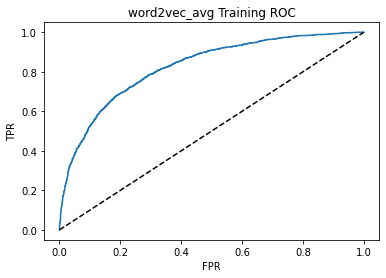

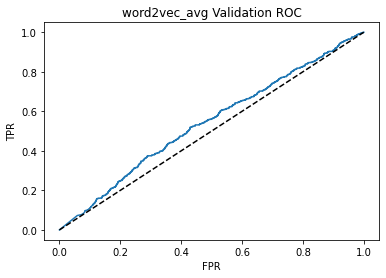

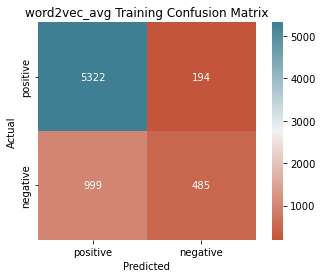

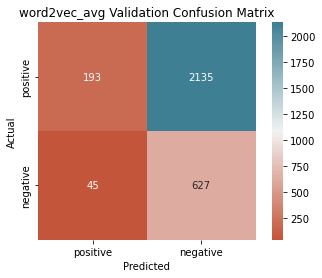

Now on word2vec_sum
    Running model using specified parameters


KeyboardInterrupt: 

In [59]:
train_data = { 
              'bag_of_words' : bow_train,
              'tf_idf'       : tf_idf_train,
              'word2vec' : word2vec_features_train
             }

val_data = { 
              'bag_of_words' : bow_val,
              'tf_idf'       : tf_idf_val,
              'word2vec' : word2vec_features_val
            }

importances_features_all   = {}
train_metrics_features_all  = {}
test_metrics_features_all   = {}
best_params_features_all   = {}
fit_models_features_all    = {}

# Since the grid search function is used to pass the params to the model function in the run_model function below,
# we must specify a range even if we are only using a single parameter value

params = {
            'random_state' : [0], 
            'penalty'      : ["l1"], 
            'solver'       : ["liblinear"], 
        }

for method, train_dataset in train_data.items():
    
    print("Now on", method)
    try:
        (importances_features_all[method], 
         train_metrics_features_all[method], 
         test_metrics_features_all[method], 
         best_params_features_all[method], 
         fit_models_features_all[method])         = run_model(method, 
                                                             train_dataset,
                                                             y_train,
                                                             val_data[method],
                                                             y_val,
                                                             LogisticRegressionCV,
                                                             params)
        
        
    except Exception as e: 
        print("Could not run", method, "due to", e)
   

##### Performance statistics

##### Train

In [60]:
train_metricsdf = pd.DataFrame(train_metrics_features_all).transpose()
train_metricsdf

,training_time,accuracy,precision,recall,f1,auc
bag_of_words,769.060120,0.892286,0.905556,0.549191,0.683725,0.949227
tf_idf,9.253765,0.825714,0.713592,0.297170,0.419600,0.830155
word2vec_avg,15340.724815,0.829571,0.714286,0.326819,0.448451,0.824829


##### Test

In [61]:
test_metricsdf = pd.DataFrame(test_metrics_features_all).transpose()
test_metricsdf

,training_time,accuracy,precision,recall,f1,auc
bag_of_words,769.060120,0.823000,0.691057,0.379464,0.489914,0.846803
tf_idf,9.253765,0.812333,0.661721,0.331845,0.442022,0.813291
word2vec_avg,15340.724815,0.273333,0.227009,0.933036,0.365172,0.541808


##### Conclusion

We will select tf_idf as the best feature generation method because it has a much lower training time than bag of words while still offering a comparable test AUC. Word2vec is clearly a poor choice of a feature generation method.

In [207]:
best_features_method = 'tf_idf'

In [64]:
train_data = train_data[best_features_method]
val_data = val_data[best_features_method]

##### This is what the features generated from TF-IDF look like

In [65]:
train_data.head()

,hav,thi,tak,day,work,pain,effect,year,aft,week,...,decid,stay,thank,const,ov year,quit,told,review,said,los
7681,0.024378,0.027676,0.000000,0.000000,0.000000,0.00000,0.036117,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9031,0.045101,0.000000,0.055752,0.060362,0.066149,0.00000,0.000000,0.000000,0.066603,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3691,0.000000,0.045890,0.049968,0.054101,0.029643,0.00000,0.000000,0.000000,0.119387,0.031969,...,0.05525,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
202,0.000000,0.057315,0.000000,0.101354,0.000000,0.00000,0.000000,0.000000,0.074555,0.039927,...,0.00000,0.071923,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5625,0.016675,0.000000,0.000000,0.044636,0.000000,0.02921,0.000000,0.024583,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.047273,0.0,0.0


In [66]:
val_data.head()

,hav,thi,tak,day,work,pain,effect,year,aft,week,...,decid,stay,thank,const,ov year,quit,told,review,said,los
9394,0.098752,0.000000,0.081382,0.000000,0.000000,0.0,0.0,0.000000,0.048611,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
898,0.023418,0.026586,0.028949,0.031343,0.000000,0.0,0.0,0.000000,0.034583,0.037041,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2398,0.049057,0.055693,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5906,0.000000,0.037548,0.000000,0.000000,0.000000,0.0,0.0,0.048758,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2343,0.000000,0.039287,0.000000,0.000000,0.050756,0.0,0.0,0.000000,0.000000,0.054737,...,0.0,0.0,0.0,0.097615,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
importancesdf = pd.DataFrame(index = importances_features_all[best_features_method].keys(), 
                                 data = importances_features_all[best_features_method].values(),
                                 columns = ['coef_value'])
print("Negative words:")
print(importancesdf.head(10), "\n")
print("Positive words:")
print(importancesdf.sort_values(by='coef_value', ascending = True).head(10), "\n")
most_helpful_negative = importancesdf.idxmax()[0]
most_helpful_not_negative = importancesdf.idxmin()[0]
print("The lemmatized word/bigram most useful in predicting negative reviews is:",
     most_helpful_negative, "\n",
     "and the lemmatized word/bigram most useful in predicting non-negative reviews is:",
     most_helpful_not_negative)

Negative words:
        coef_value
wors     14.747818
worst    13.233777
horr     10.782682
nev       7.243235
thi       6.196448
al        6.190664
blee      5.726373
const     5.676562
terr      5.663235
switch    5.257059 

Positive words:
       coef_value
amaz   -19.474550
lov    -16.511053
best   -14.731709
lif    -11.398160
wond   -11.078162
gre    -10.567174
far    -10.080375
year    -9.582441
happy   -9.421051
bit     -7.581308 

The lemmatized word/bigram most useful in predicting negative reviews is: wors 
 and the lemmatized word/bigram most useful in predicting non-negative reviews is: amaz


## Feature Engineering

Checking that the data is ready for us to proceceed:

In [68]:
all(train_data.index == x_train.index) & all(val_data.index == x_val.index)

True

In [69]:
x_train = drug_reviews.loc[train_data.index]
x_train.head()

,Unnamed: 0,uniqueID,drugName,condition,review,rating,date,usefulCount,cleaned_review
7681,7681,136086,Relpax,Migraine,This is my MIRACLE drug! I've suffered with mi...,10,17-Sep-15,8,thi mirac drug suff migrain sint around ag tri...
9031,9031,184349,Hydroxyzine,Anxiety,I was taking 50 mg three times a day. It work...,8,19-Feb-15,59,tak mg three tim day work awesom anxy howev af...
3691,3691,53616,Alesse,Birth Control,I started the birth control last summer in Aug...,7,19-Apr-15,3,start bir control last sum august stop thi apr...
202,202,126485,Brimonidine,Rosacea,Stay away from this medication. The 1st day us...,1,27-Jun-16,21,stay away thi med day us impress day lat rebou...
5625,5625,86297,Magnesium sulfate / potassium sulfate / sodium...,Bowel Preparation,I'm 40 and had my first colonoscopy due to fam...,9,1-Aug-14,22,first colonoscop due famy hist colon cant reco...


In [70]:
x_val = drug_reviews.loc[val_data.index]
x_val.head()

,Unnamed: 0,uniqueID,drugName,condition,review,rating,date,usefulCount,cleaned_review
9394,9394,144223,Etonogestrel,Birth Control,I love the nextplanon so far. My arm was a lit...,10,28-May-16,4,lov nextplanon far arm littl sor aft plac expe...
898,898,63395,Epiduo,Acne,I am currently taking Minocycline and I just g...,8,24-Aug-16,3,cur tak minocyclin got fac peel week ago day a...
2398,2398,6524,Sodium biphosphate / sodium phosphate,Bowel Preparation,Just used this product for first time in prepa...,9,1-Dec-16,5,us thi produc first tim prep hemorrhoid remov ...
5906,5906,68694,Medroxyprogesterone,Abnormal Uterine Bleeding,Took the depo shot for the first time earlier ...,1,29-Mar-17,6,took depo shot first tim ear thi year complet ...
2343,2343,6508,Wellbutrin XL,Depression,Been on it for one week. 150XL dry mouth. Lost...,4,2-Jul-17,12,week dry mou lost voic insomn adam chip slay w...


We will define a function which creates a dictionary of all conditions and the drugs that treat them, based on the data in this dataset.

In [220]:
def drugs_by_condition():
    all_conditions = drug_reviews.condition.drop_duplicates()
    all_drug_conditions_dict = {}

    for condition in list(all_conditions):
        drugs_in_condition = drug_reviews.loc[drug_reviews.condition == condition, 'drugName'].drop_duplicates()
        all_drug_conditions_dict[condition] = list(drugs_in_condition)
    
    return all_drug_conditions_dict

all_drug_conditions_dict = drugs_by_condition()
all_drug_conditions_dict

{'Left Ventricular Dysfunction': ['Valsartan', 'Coreg'],
 'ADHD': ['Guanfacine',
  'Daytrana',
  'Intuniv',
  'Focalin',
  'Vyvanse',
  'Lisdexamfetamine',
  'Amphetamine / dextroamphetamine',
  'Atomoxetine',
  'Concerta',
  'Strattera',
  'Focalin XR',
  'Methylphenidate',
  'Ritalin',
  'Kapvay',
  'Adderall',
  'Bupropion',
  'Dexmethylphenidate',
  'Wellbutrin SR',
  'Zenzedi',
  'Desoxyn',
  'Adderall XR',
  'Adzenys XR-ODT',
  'Pemoline',
  'Nuvigil',
  'Dyanavel XR',
  'Dextroamphetamine',
  'Methylin ER',
  'Dexedrine',
  'Amphetamine',
  'Quillivant XR',
  'Omega-3 polyunsaturated fatty acids'],
 'Birth Control': ['Lybrel',
  'Ortho Evra',
  'Ethinyl estradiol / levonorgestrel',
  'Nexplanon',
  'Etonogestrel',
  'Implanon',
  'Drospirenone / ethinyl estradiol',
  'NuvaRing',
  'Gildess Fe 1 / 20',
  'Lo Loestrin Fe',
  'Levonorgestrel',
  'Sronyx',
  'Jolivette',
  'Aviane',
  'Depo-Provera',
  'Ethinyl estradiol / norgestimate',
  'Mirena',
  'Ethinyl estradiol / norelgestr

Using this dictionary and the features already present in the data, we can engineer several more features which will help us in prediction. The function defined below will do that.

In [72]:
def add_data_features_to_review_features(review_features_df, source_features_df, all_drug_conditions_dict):
    # This function uses a "source_features_df", which is from the original dataframe, and uses it
    # to add features to the a dataframe of features we've already generated using one of the methods explored
    # above. Using this function we ensure that we use the same training/val data that we used before.
    
    
    # datetime additions
    
    # this if statement essentially detects if this function has been run before, and allows it to be re-run
    # multiple times in case you want to make changes to it
    if source_features_df['date'].dtype != 'datetime64[ns]':
        source_features_df['date']             = source_features_df.date.map(lambda x: datetime.strptime(x, '%d-%b-%y'))
        year_dummies                           = pd.get_dummies(source_features_df.date.dt.year, prefix = "year")
        review_features_df                     = pd.concat([review_features_df, year_dummies], axis = 1)
        
    review_features_df['rating_month']     = source_features_df.date.dt.month
    review_features_df['rating_day']       = source_features_df.date.dt.day
    review_features_df['rating_dayofweek'] = source_features_df.date.dt.day_of_week
    review_features_df['usefulcount']      = source_features_df['usefulCount']

        
    # creating a variable that indicates whether a competitor was mentioned
    for idx, data in source_features_df.iterrows():
        
        competitors                = all_drug_conditions_dict[data.condition]
        owndrug                    = data.drugName.lower()
        competitors                = [drug.lower() for drug in competitors if drug != owndrug]
        unique_competitors_named   = 0
        total_competitor_mentions  = 0
        owndrug_mentions           = 0
        
        for drug in competitors:
            unique_competitors_named = unique_competitors_named + (drug in data.review)
            
            for word in data.review:
                if drug == word:
                    total_competitor_mentions = total_competitor_mentions + 1
                    
                if owndrug == word:
                    owndrug_mentions = owndrug_mentions + 1
        

        review_features_df['unique_competitors_named']                = unique_competitors_named
        review_features_df['total_competitors']                       = len(competitors)
        review_features_df['total_competitor_mentions']               = total_competitor_mentions
        review_features_df['owndrug_mentions']                        = owndrug_mentions
        
        # returns zero if the denominator is zero
        def allow_zero_division(n, d):
            return n / d if d else 0
        
        review_features_df['prop_of_competitors_named']               = allow_zero_division(unique_competitors_named, len(competitors))
        review_features_df['owndrug_to_competitor_mention_ratio']     = allow_zero_division(owndrug_mentions, total_competitor_mentions)
        
        return review_features_df
        

We will call the above function on both the training and the validation data. This way we can ensure that the features are generated exactly the same way on the training and validation data. 

In [73]:
train_data = add_data_features_to_review_features(train_data, x_train, all_drug_conditions_dict)
val_data   = add_data_features_to_review_features(val_data, x_val, all_drug_conditions_dict)

The training and validation data now have our features attached to the end of them.

In [74]:
train_data.head()

,hav,thi,tak,day,work,pain,effect,year,aft,week,...,rating_month,rating_day,rating_dayofweek,usefulcount,unique_competitors_named,total_competitors,total_competitor_mentions,owndrug_mentions,prop_of_competitors_named,owndrug_to_competitor_mention_ratio
7681,0.024378,0.027676,0.000000,0.000000,0.000000,0.00000,0.036117,0.000000,0.000000,0.000000,...,9,17,3,8,0,34,0,0,0.0,0
9031,0.045101,0.000000,0.055752,0.060362,0.066149,0.00000,0.000000,0.000000,0.066603,0.000000,...,2,19,3,59,0,34,0,0,0.0,0
3691,0.000000,0.045890,0.049968,0.054101,0.029643,0.00000,0.000000,0.000000,0.119387,0.031969,...,4,19,6,3,0,34,0,0,0.0,0
202,0.000000,0.057315,0.000000,0.101354,0.000000,0.00000,0.000000,0.000000,0.074555,0.039927,...,6,27,0,21,0,34,0,0,0.0,0
5625,0.016675,0.000000,0.000000,0.044636,0.000000,0.02921,0.000000,0.024583,0.000000,0.000000,...,8,1,4,22,0,34,0,0,0.0,0


In [75]:
val_data.head()

,hav,thi,tak,day,work,pain,effect,year,aft,week,...,rating_month,rating_day,rating_dayofweek,usefulcount,unique_competitors_named,total_competitors,total_competitor_mentions,owndrug_mentions,prop_of_competitors_named,owndrug_to_competitor_mention_ratio
9394,0.098752,0.000000,0.081382,0.000000,0.000000,0.0,0.0,0.000000,0.048611,0.000000,...,5,28,5,4,0,105,0,0,0.0,0
898,0.023418,0.026586,0.028949,0.031343,0.000000,0.0,0.0,0.000000,0.034583,0.037041,...,8,24,2,3,0,105,0,0,0.0,0
2398,0.049057,0.055693,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,12,1,3,5,0,105,0,0,0.0,0
5906,0.000000,0.037548,0.000000,0.000000,0.000000,0.0,0.0,0.048758,0.000000,0.000000,...,3,29,2,6,0,105,0,0,0.0,0
2343,0.000000,0.039287,0.000000,0.000000,0.050756,0.0,0.0,0.000000,0.000000,0.054737,...,7,2,6,12,0,105,0,0,0.0,0


## Model Selection
We will again use the run_model function. This time, the variable will be the model. We will take the data generated above (TF-IDF features + engineered features) and pass it to each of the models below. These are:
1. Logistic regression
2. Random Forest
3. Gradient Boosting
4. Naive Bayes

We have defined dictionaries containg ranges of parameters to search using the GridSearchCV function. This will occur inside of the run_model function. The best parameters will be determined using the 'roc_auc' scoring method. The model using the best parameters will be output from the run_model function. 

The outputs of the run_model function will be compared below, just like we have done throughout this notebook, to find the best model for predicting review negativity using the features we have worked on generating thus far.

Now on LogisticRegressionCV
    Running model using specified parameters
    Calculating Metrics


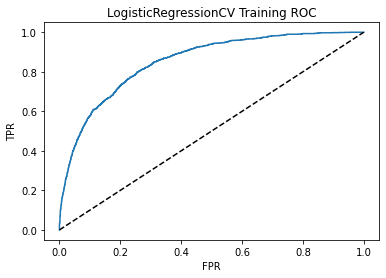

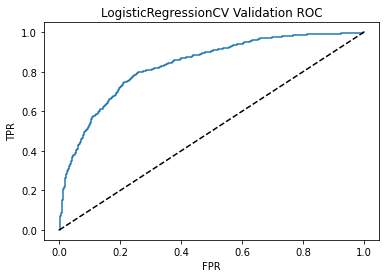

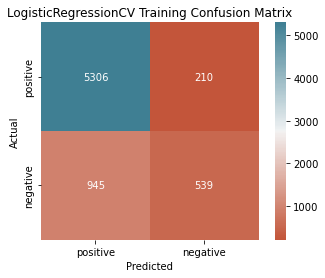

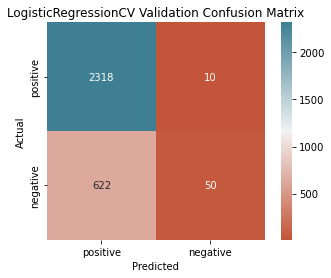

Now on RandomForestClassifier
    Running model using specified parameters
    Calculating Metrics


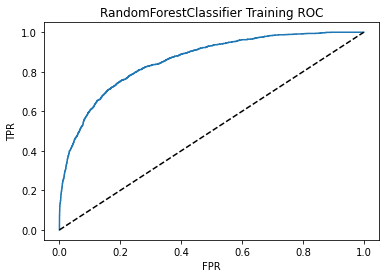

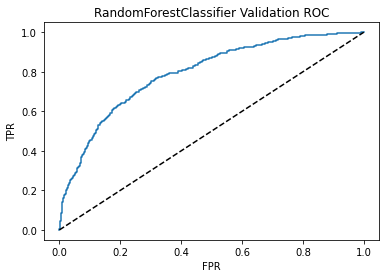

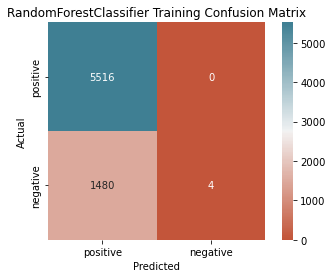

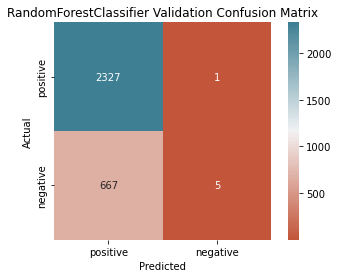

Now on GradientBoostingClassifier
    Running model using specified parameters
    Calculating Metrics


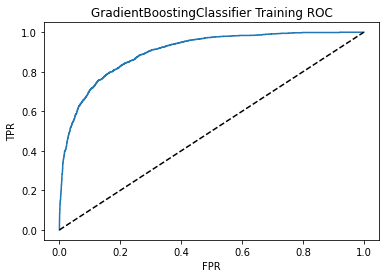

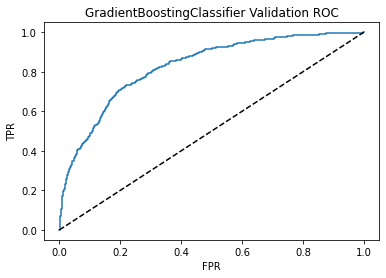

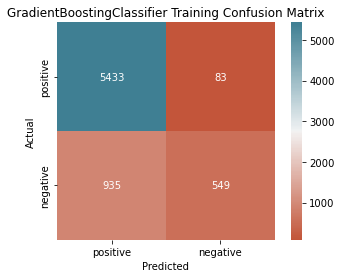

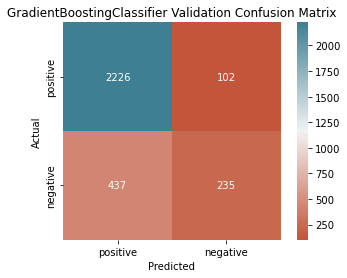

Now on NaiveBayesClassifier
    Running model using specified parameters


/Users/jacobbayer/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 57 is smaller than n_iter=100. Running 57 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


    Calculating Metrics


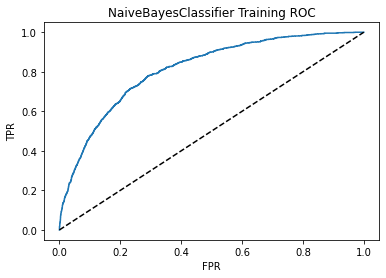

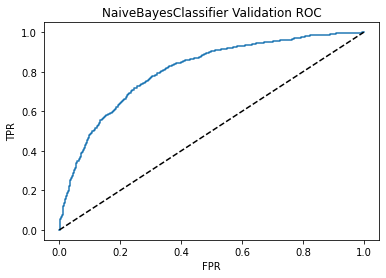

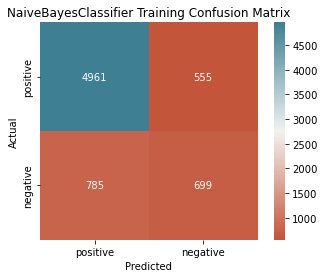

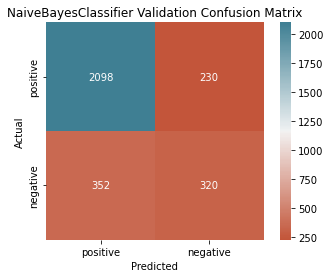

In [86]:
logit_params = {
            'random_state' : [0], 
            'penalty'      : ["l1"], 
            'solver'       : ["liblinear"]
                }

rf_params = {
              "max_depth"          : range(2, 8), 
              "min_samples_leaf"   : range(5, 55, 5), 
              "min_samples_split"  : range(10, 110, 5),
              "n_estimators"       : [100, 150, 200, 250, 300, 350, 400]
             }

gb_params = {
              "max_depth":range(2, 6), 
              "min_samples_leaf": range(5, 55, 5), 
              "min_samples_split": range(10, 110, 5),
              "subsample":[0.6, 0.7, 0.8], 
              "max_features": [2, 3, 4, 5, 6],
              "n_estimators": [50, 100, 150, 200], 
              "learning_rate": [0.1, 0.2, 0.3]
             }

nb_params = { 
                'alpha' : [0.1, 0.2, 0.25, 0.5, 0.6, 0.7, 0.8, 0.9] + list(range(1, 50))
            }


models_params = { 
              'LogisticRegressionCV'       : {'func'       : LogisticRegressionCV,
                                              'params'     : logit_params, 
                                              'search_type': 'grid'},

              'RandomForestClassifier'     : {'func'       : RandomForestClassifier,
                                              'params'     : rf_params, 
                                              'search_type': 'randomized'},
              
              'GradientBoostingClassifier' : {'func'       : GradientBoostingClassifier,
                                              'params'     : gb_params,
                                              'search_type': 'randomized'},
    
              'NaiveBayesClassifier'       : {'func'       : BernoulliNB,
                                              'params'     : nb_params,
                                              'search_type': 'randomized'}   
              
             }



training_times_models = {}
train_metrics_models  = {}
test_metrics_models   = {}
importances_models    = {}
fit_models_models     = {}
best_params_models     = {}

for method, data in models_params.items():
    print("Now on", method)
    try:
        (importances_models[method], 
         train_metrics_models[method], 
         test_metrics_models[method], 
         best_params_models[method], 
         fit_models_models[method])      = run_model(method, 
                                                    train_data,
                                                    y_train,
                                                    val_data,
                                                    y_val,
                                                    model_func = data['func'],
                                                    params_dict = data['params'],
                                                    search_type = data['search_type'])
        
        
    except Exception as e:
        print("Unable to do", method, "due to:", e)

   

##### Performance

##### Train

In [80]:
train_metricsdf = pd.DataFrame(train_metrics_models)
train_metricsdf

,LogisticRegressionCV,RandomForestClassifier,GradientBoostingClassifier,NaiveBayesClassifier
training_time,18.860772,165.589714,41.628641,4.455383
accuracy,0.835000,0.788714,0.864286,0.808571
precision,0.719626,1.000000,0.867769,0.557416
recall,0.363208,0.003369,0.424528,0.471024
f1,0.482759,0.006716,0.570136,0.510592
auc,0.852307,0.861411,0.919859,0.811557


##### Test

In [154]:
test_metricsdf = pd.DataFrame(test_metrics_models)
test_metricsdf

,LogisticRegressionCV,RandomForestClassifier,GradientBoostingClassifier,NaiveBayesClassifier
training_time,19.018534,170.333491,43.188866,5.355988
accuracy,0.789333,0.777333,0.820333,0.806000
precision,0.833333,0.833333,0.697329,0.581818
recall,0.074405,0.007440,0.349702,0.476190
f1,0.136612,0.014749,0.465808,0.523732
auc,0.834610,0.792526,0.827056,0.805143


##### Conclusion

We believe the best model is Naive Bayes, since it has the best balance between AUC and training time.

In [155]:
best_model = 'NaiveBayesClassifier'

##### Word/bigram Importances

##### Logistic regression

In [156]:
# Top 10 words/bigrams associated with negative reviews
logitimp = pd.Series(importances_models['LogisticRegressionCV'])
logitimp.head(10)

wors      13.883213
worst     12.545610
horr       9.540195
nev        6.879003
al         6.306518
mad        5.678520
blee       5.453313
caus       5.352960
doct       5.296158
switch     5.204302
dtype: float64

In [157]:
# Top 10 words/bigrams associated with positive reviews
logitimp.tail(10).sort_values()

amaz    -18.341967
lov     -16.227615
best    -13.720398
far     -10.173115
wond     -9.704529
gre      -9.300835
year     -9.067951
lif      -8.960909
happy    -8.295951
bit      -7.725283
dtype: float64

##### Random forest importances

In [158]:
rfimp = pd.DataFrame(importances_models['RandomForestClassifier'])
rfimp.head(20)

,RandomForestClassifier_imp
hav,0.015098
thi,0.022514
tak,0.006322
day,0.004955
work,0.017243
pain,0.002389
effect,0.008639
year,0.022843
aft,0.005143
week,0.003319


##### Gradient boosting importances

In [159]:
gbimp = pd.DataFrame(importances_models['GradientBoostingClassifier'])
gbimp = gbimp.merge(rfimp, left_index = True, right_index = True).sort_values(by="GradientBoostingClassifier_imp", ascending = False)

##### Naive Bayes Importances

We use features that came from information gain calculations. We calculate probability of being positive and negative for each feature. Then, we use comments that in testing set. Each word of these comments compare features and if there are features in these comment, each feature probability value multiply with each other. If positive probability multiplication bigger than negative probability multiplication of a testing comment, this comment’s class is positive and vice versa.

In [161]:
NB_optimal = fit_models_models['NaiveBayesClassifier']

In [193]:
important_features= pd.DataFrame(data    = np.transpose(np.e**NB_optimal.feature_log_prob_).astype("float32"),
                                 index   = train_data.columns,
                                 columns = ['negative_probability','positive_probability'])
pd.set_option("display.max_rows", None)
important_features.sort_values(by = 'positive_probability', ascending = False)

,negative_probability,positive_probability
total_competitors,0.999982,0.999933
rating_day,0.999982,0.999933
rating_month,0.999982,0.999933
usefulcount,0.962637,0.944010
rating_dayofweek,0.847522,0.868549
thi,0.484591,0.578830
hav,0.632881,0.556596
tak,0.438182,0.420496
day,0.376727,0.360531
aft,0.297143,0.329538


## Putting the model into practice

Here we define a function that generates features using the methodology we have developed so far and using the model we selected (Naive bayes) to estimate the probability of a review being negative. We will test this out on custom sentences that we will define.

In [163]:
def custom_classify(model, data, feature_generation_method, thrs = 0.5):
    
    if not feature_generation_method == best_features_method:
        raise("Not supported if train_data is not generated using the same feature method")
    
    text = data.review[0]

                
    def add_engineered_features(x, data):
        x = add_data_features_to_review_features(x, data, all_drug_conditions_dict)
        year = str(data.date[0].year)
        years = ['year_2008',
                 'year_2009',
                 'year_2010',
                 'year_2011',
                 'year_2012',
                 'year_2013',
                 'year_2014',
                 'year_2015',
                 'year_2016',
                 'year_2017']
        x[years] = 0
        x['year_' + year] = 1
        return x
    
    def harmonize_columns(x, data):
        for col in x.columns:
            if col not in bow_train.columns:
                del x[col]
        x = add_engineered_features(x, data)
        columns_to_make = list(set(train_data.columns).difference(set(x.columns)))
        new_cols = pd.DataFrame(data = np.zeros((1,len(columns_to_make))), columns = columns_to_make)
        x = pd.concat([x, new_cols], axis = 1)  
        x = x[train_data.columns].copy()
        return x

    
    def generate_individual_word2vec_features(text, func):
        clean_tokens = nltk.tokenize.word_tokenize(text)
        agg_embeddings = []
        
        for index in tqdm(range(len(clean_tokens))):

            # get the document by index
            document = clean_tokens[index]

            # get word embeddings for the current document in the loop
            # the if condition handles cases where the word is not in the word2vec model 
            # this would include the words that occurred less than 5 times as limited in the code earlier
            embeddings = [word2vec.wv[word] for word in document if word in word2vec.wv]

            # if none of the words have a word embedding, there will be an empty list
            # need 300 dimensions to match the regular cases, so we'll create a list of 300 missing values
            if embeddings == []:
                agg_embeddings.append([0] * 300)
            else:
                # otherwise, just get the mean componentwise across all the word embeddings and append to our list
                agg = func(embeddings, axis = 0)
                agg_embeddings.append(agg)

        agg_embeddings = [array if isinstance(array, list) else array.tolist() for array in agg_embeddings]
        agg_embeddings = pd.DataFrame(agg_embeddings)
        return agg_embeddings
    
    if feature_generation_method == 'word2vec_avg':
        func = np.mean
        x = generate_individual_word2vec_features(text, func)
        x = harmonize_columns(x, data)
        
    elif feature_generation_method == 'word2vec_sum':
        func = np.sum
        x = generate_individual_word2vec_features(text, func)
        x = harmonize_columns(x, data)
        
        
    elif feature_generation_method == 'bag_of_words':
        count_vec = CountVectorizer(ngram_range = eval(best_bow_ngram_range), stop_words = "english", lowercase = True)
        bow_features = count_vec.fit_transform([text])
        bow_features = pd.DataFrame(bow_features.toarray(), 
                                    columns = count_vec.get_feature_names_out())
        x = bow_features
        x = harmonize_columns(x, data)
    
    elif feature_generation_method == 'tf_idf':
        tf_idf = TfidfVectorizer(ngram_range = eval(best_tf_idf_ngram_range), stop_words = "english", lowercase = True)

        tf_idf_features = tf_idf.fit_transform([text])
        tf_idf_features = pd.DataFrame(tf_idf_features.toarray(), 
                                       columns = tf_idf.get_feature_names_out())
        x = tf_idf_features
        x = harmonize_columns(x, data)
        
        

    probs = best_model_func.predict_proba(x)[0]
    prediction = ['"negative review"' if probs[1] > thrs else '"not negative review"'][0]
    print("Probability of being a highly negative review:", round(probs[1], 2))
    print("Given your threshold of:", thrs, ", this review is classified as a", prediction)
    
    #return x

In [164]:
def cbind(review,drugName,condition,date,usefulCount):
    return pd.DataFrame(data = {
              "drugName"    : drugName,
              "condition"   : condition,
              "review"      : ' '.join(review.split()),
              "date"        : date,
              "usefulCount" : usefulCount
             },
             index = [0]
            )

We will simulate that of these custom, new reviews are for the same drug, Topiramate, which treats Migraine Prevention. They are simulated to have been written on June 5th, 2017, with a usefulness count of 5.

In [223]:
drugName = "Topiramate"
condition = "Migraine Prevention"
date = '05-Jun-17'
usefulCount = 5

##### Defining a negative review

In [167]:
neg_sentence = """
            This drug was so awful to use. 
            I wish that I had never tried it. 
            My symptoms got worse, not better.
            I can't recommend that other people try this product.
           """

In [168]:
neg_sentence = clean_text(neg_sentence)
neg_sentence

'thi drug aw us wish nev tri symptom got wors bet ca recommend oth peopl try thi produc'

##### Positive review

In [169]:
pos_sentence = """
                This drug was so great to use. 
                I'm so happy I tried it. 
                My symptoms improved.
                I want to recommend that other people try this product.
             """

In [170]:
pos_sentence = clean_text(pos_sentence)
pos_sentence

'thi drug gre us happy tri symptom improv want recommend oth peopl try thi produc'

In [173]:
neg_example = cbind(neg_sentence,drugName,condition,date,usefulCount)
pos_example = cbind(pos_sentence,drugName,condition,date,usefulCount)

This is the row of data that our custom_classify function will ingest:

In [174]:
pos_example

,drugName,condition,review,date,usefulCount
0,Topiramate,Migraine Prevention,thi drug gre us happy tri symptom improv want ...,05-Jun-17,5


In [175]:
best_model_func = fit_models_models[best_model]

##### Classification

In [176]:
custom_classify(best_model_func, neg_example, best_features_method)

Probability of being a highly negative review: 0.94
Given your threshold of: 0.5 , this review is classified as a "negative review"


In [177]:
custom_classify(best_model_func, pos_example, best_features_method)

Probability of being a highly negative review: 0.25
Given your threshold of: 0.5 , this review is classified as a "not negative review"


## Conclusion
The best feature generation method was TF-IDF. Using all of the features we generated from TF-IDF and feature engineering, we determined that a Naive Bayes model was the optimal model for predicting negative reviews. Naive bayes uses all features to generate its predictions.

## References

[1] Harris Zellig (1954). “Distributional Structure”. Word. 146-162

[2] Tomas Mikolov (2013). “Distributed representations of words and phrases and their compositionality". Advances in Neural Information Processing Systems. arXiv:1310.4546

[3] Y. Wang and Y. Zhang (2013), "Nonnegative Matrix Factorization: A Comprehensive Review,"  IEEE Transactions on Knowledge and Data Engineering, vol. 25, no. 6, pp. 1336-1353, doi: 10.1109/TKDE.2012.51.

[4] David Blei, Andrew Ng, Michael Jordan (2003), “Latent Dirichlet Allocation”. Journal of Machine Learning Research 3(4-5): pp. 993-1022.  doi:10.1162/jmlr.2003.3.4-5.993

[5] Yong Chen, Hui Zhang, Rui Liu, Zhiwen Ye, Jianying Lin,(2019) “Experimental explorations on short text topic mining between LDA and NMF based Schemes,” in Knowledge-Based Systems, Volume 163, Pages 1-13, ISSN 0950-7051, doi.org/10.1016/j.knosys.2018.08.011.

[6] Cao, L., & Fei-Fei, L. (2007). “Spatially coherent latent topic model for concurrent segmentation and classification of objects and scenes.” IEEE 11th International Conference on Computer Vision (pp. 1-8). IEEE.

[7] Valle, .F,Osella, M., Caselle, M. (2020). “A Topic Modelling Analysis of TCGA Breast and Lung Cancer 
transcriptomic Data” Cancer. 12(12): 3799, doi:10.3390/cancers12123799

[8] Treadway, A. (2021, December). Cis 9660 - Lecture 8 - Text Mining & NLP. Lecture. 